In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
data=pd.read_csv(r"C:\Users\mahar\PREDICTING AND ANALYZING  WATER QUALITY USING IBM WATSON MACHINE LEARNING\water_data.csv",encoding='ISO-8859-1',low_memory=False)

In [3]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [5]:
#describe() method computes a summary of statistics like count, mean, standard deviation, min, max and quartile values.
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [6]:
data.shape

(1991, 12)

In [7]:
data.isnull().any() #No Missing Values

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [8]:
#count of null values in each column
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [9]:
#count of null values in each column
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [10]:
#Let us convert object datatype to float for calculation of water quality index
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [11]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [12]:
data['Temp'].fillna(data['Temp'].mean(),inplace=True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(),inplace=True)
data['PH'].fillna(data['PH'].mean(),inplace=True)
data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [13]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [14]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,3428,5500.0,2014


In [15]:
#let us drop FECAL COLIFORM (MPN/100ml) as we already have
data.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [16]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


In [17]:
#Let us rename the columns for simplification
data=data.rename(columns = {'D.O. (mg/l)':'do'})
data=data.rename(columns = {'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns = {'B.O.D. (mg/l)':'bod'})
data=data.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
data=data.rename(columns =  {'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns =  {'STATION CODE':'station'})
data=data.rename(columns =  {'LOCATIONS':'location'})
data=data.rename(columns =  {'STATE':'state'})
data=data.rename(columns =  {'PH':'ph'})

In [18]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


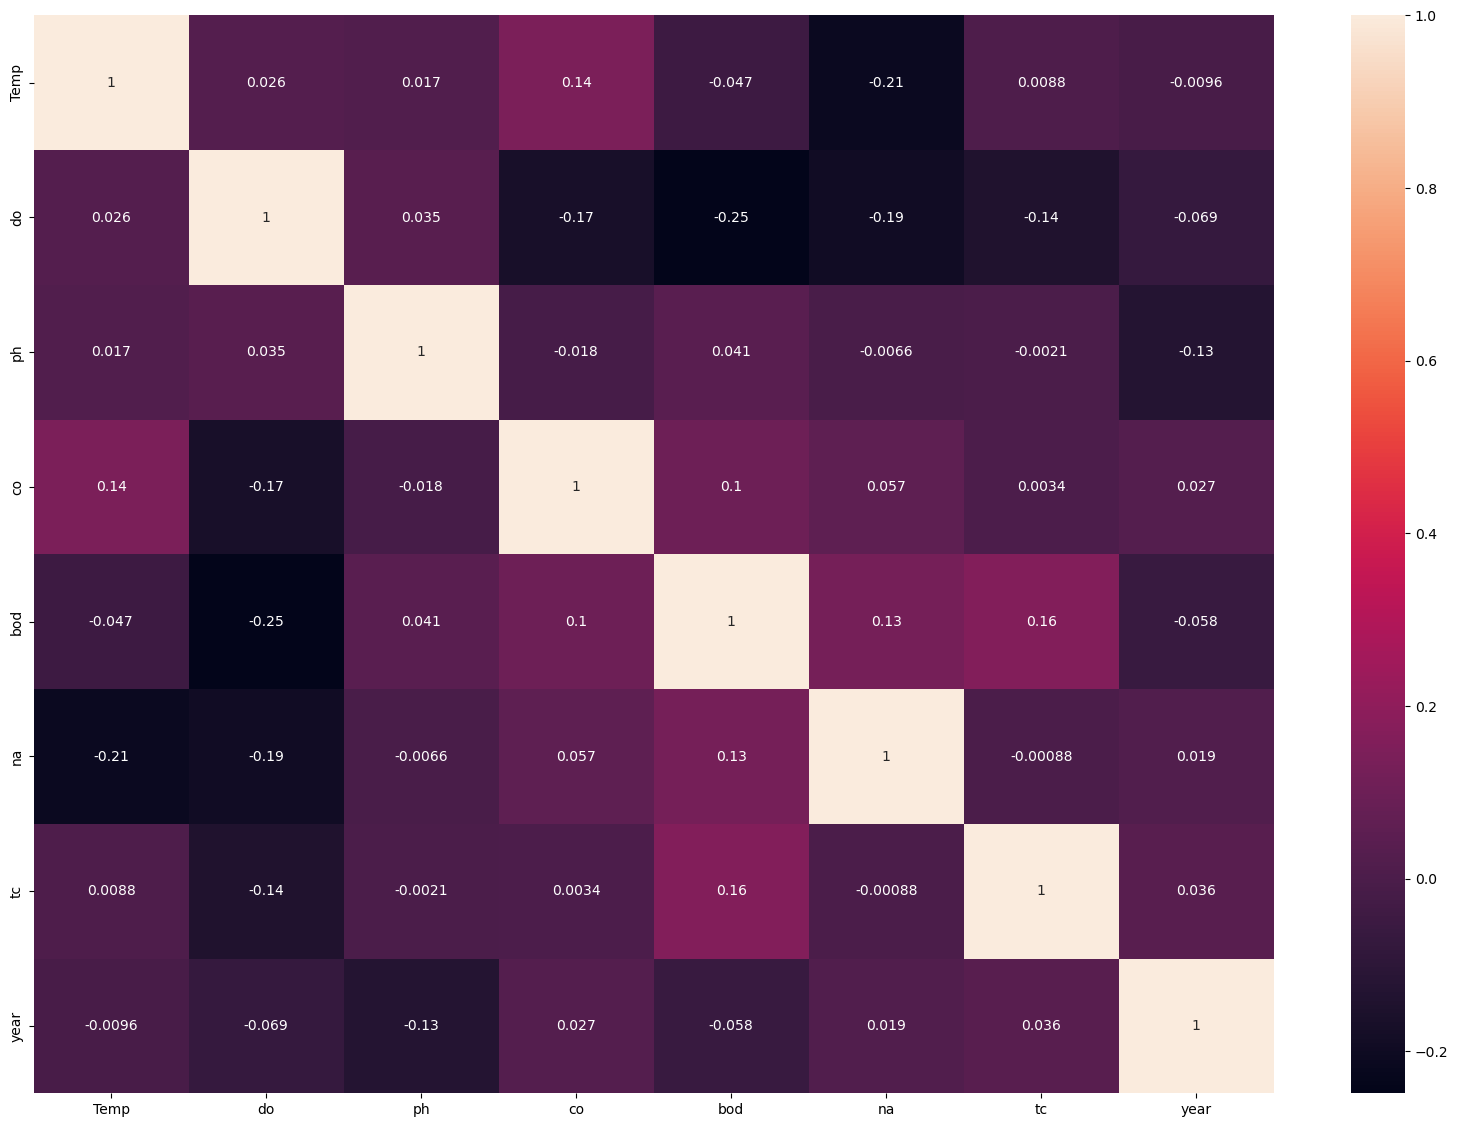

In [19]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [20]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [21]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [22]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [23]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [24]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [25]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [26]:
data.head()
data.dtypes

station      object
location     object
state        object
Temp        float64
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [27]:
# Claculate water quality index WQI
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [28]:
#calculation overall wqi for each year
average=data.groupby('year')['wqi'].mean()

In [29]:
average.head()

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: wqi, dtype: float64

In [30]:
data1=average.reset_index(level=0,inplace=False)
data1

,year,wqi
0,2003,66.239545
1,2004,61.290000
2,2005,73.762689
3,2006,72.909714
4,2007,74.233000
5,2008,73.506289
6,2009,74.456685
7,2010,75.454787
8,2011,76.666580
9,2012,79.496712


<AxesSubplot:>

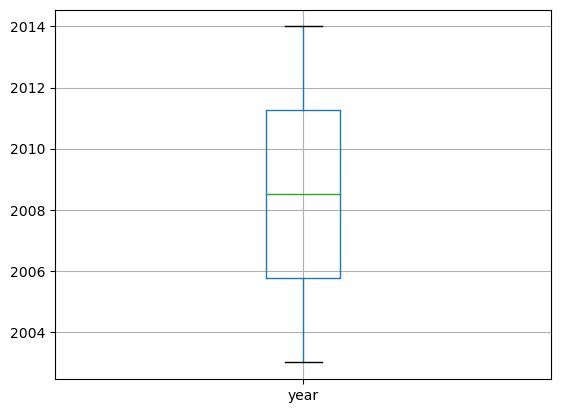

In [31]:
#Data Visualization
data1.boxplot(column='year')


C:\Users\mahar\AppData\Local\Temp\ipykernel_4064\1047255498.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


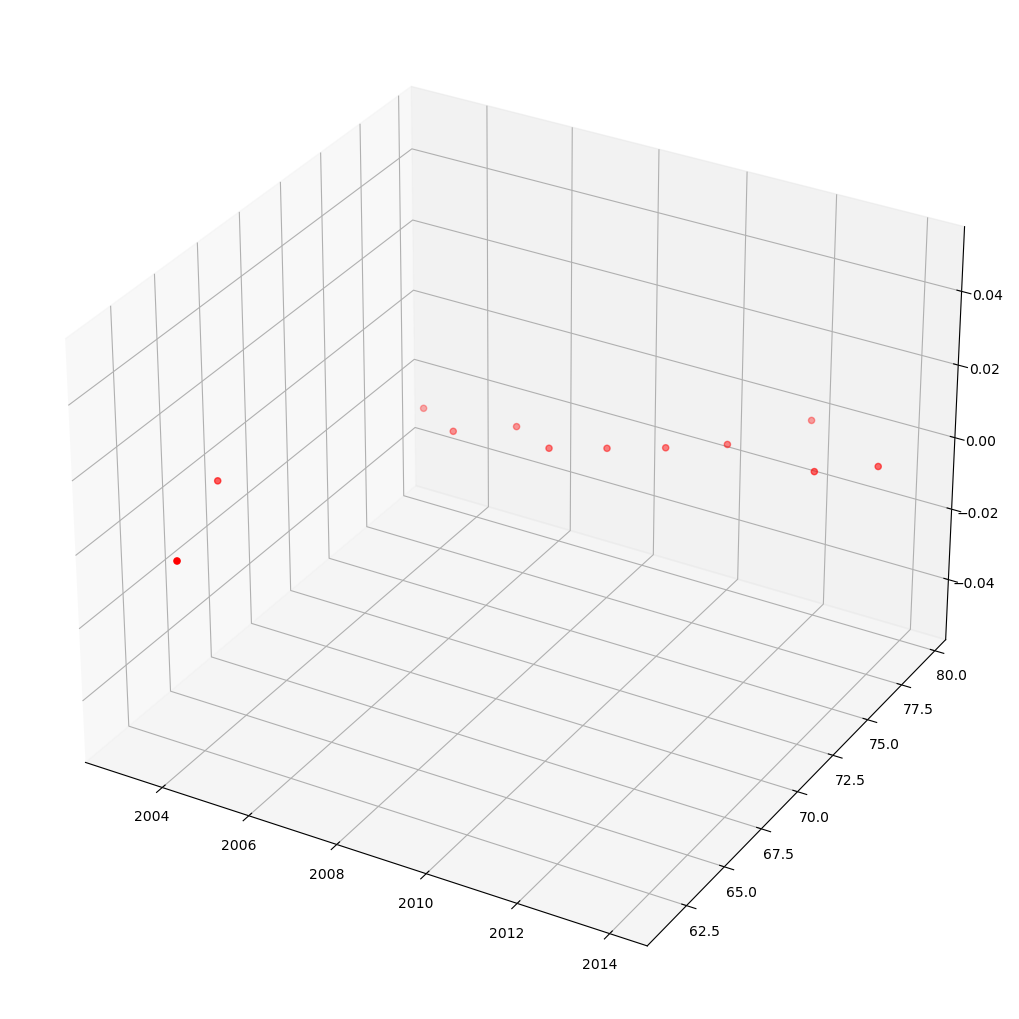

,year,wqi
0,2003,66.239545
1,2004,61.290000
2,2005,73.762689
3,2006,72.909714
4,2007,74.233000
5,2008,73.506289
6,2009,74.456685
7,2010,75.454787
8,2011,76.666580
9,2012,79.496712


In [32]:
#visualizing the filttered data

year=data1['year'].values
AQI=data1['wqi'].values
data1['wqi']=pd.to_numeric(data1['wqi'])
data1['year']=pd.to_numeric(data1['year'])

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data1

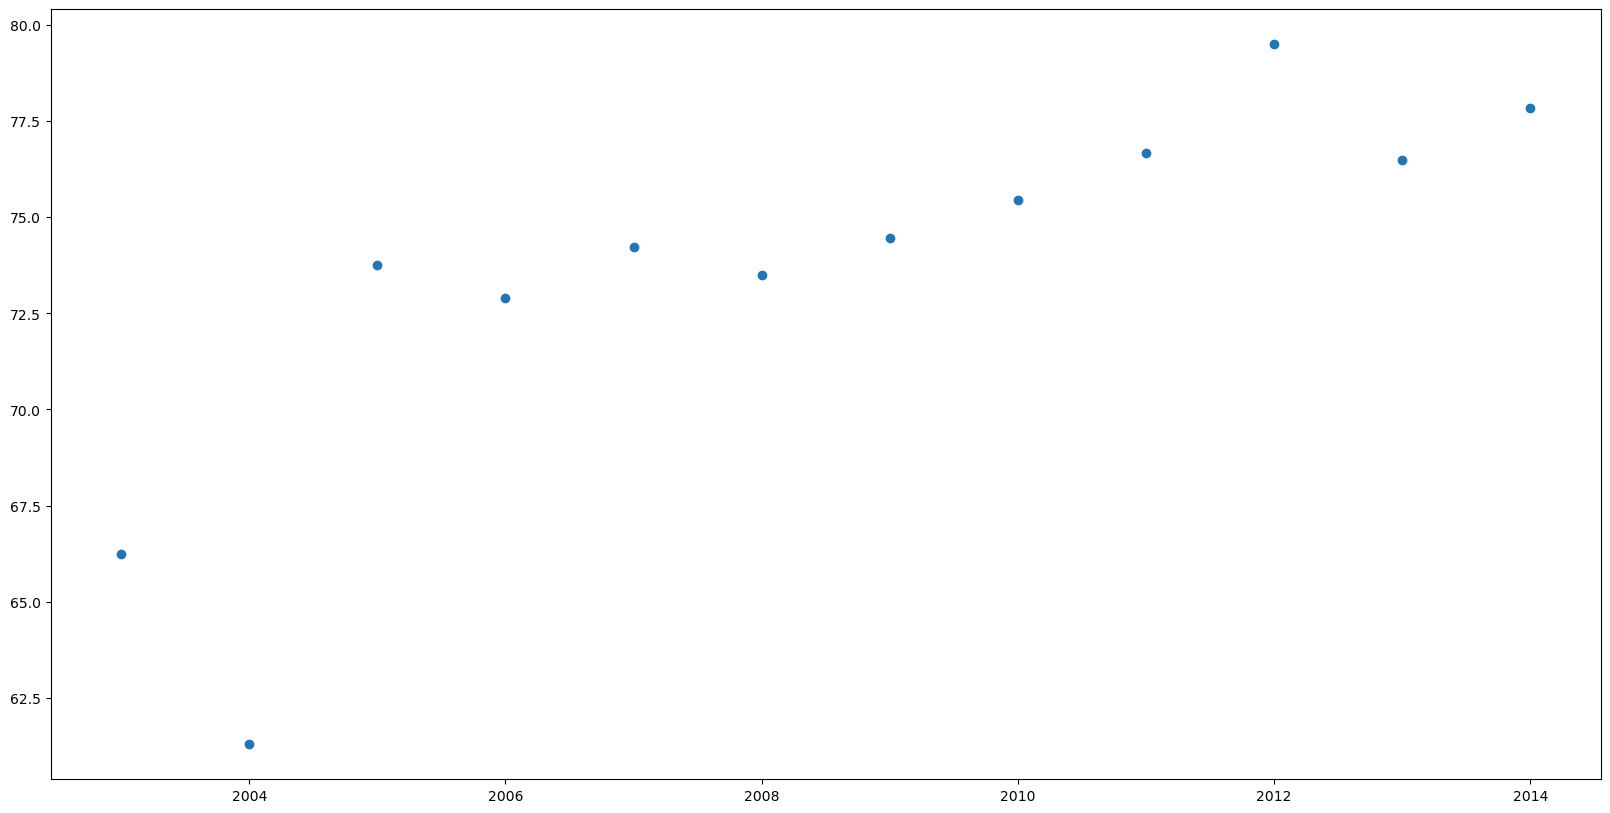

In [33]:
#scatter plot of data points
cols =['year']
y = data1['wqi']
x=data1[cols]

plt.scatter(x,y)
plt.show()

In [34]:
data.head(20)

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.500000,0.1,4049.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.2,6.1,6.7,308.0,1.400000,0.3,5672.0,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,29.6,6.4,6.7,414.0,1.000000,0.2,9423.0,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
8,3186,RIVER MANDOVI AT IFFI JETTY,GOA,30.0,6.4,7.6,305.0,2.200000,0.1,4990.0,...,100,0,100,16.5,28.10,23.40,0.00,2.8,11.24,82.04
9,3187,RIVER MANDOVI NEAR HOTEL MARRIOT,GOA,30.1,6.3,7.6,77.0,2.300000,0.1,4301.0,...,100,80,100,16.5,28.10,23.40,0.72,2.8,11.24,82.76


In [35]:
data.tail(20)

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
1971,1631,"MYNTDU RIVER JOWAI, MEGHALAYA",NAN,15.000000,6.9,142.0,7.3,2.2,1.623079,1573.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1972,1632,"GANOL RIVER TURA, MEGHALAYA",NAN,20.000000,6.9,145.0,7.8,1.8,1.623079,245.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06
1973,1633,"SIMSANG RIVER WILLIAMNAGAR, MEGHALAYA",NAN,21.000000,7.0,145.0,7.3,2.3,1.623079,363.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06
1974,1455,"RUSHIKULYA AT GANJAM U/S, ORISSA",NAN,30.000000,8.1,569.0,8.2,1.6,1.028000,6050.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1975,1456,"RUSHIKULYA AT GANJAM D/S, ORISSA",NAN,27.000000,7.7,28598.0,7.7,1.7,0.962000,3200.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1976,1642,"NAGAVALLI AT JAYKAYPUR D/S, ORISSA",NAN,30.000000,7.4,219.0,6.8,3.0,0.964000,11300.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,0.00,55.20
1977,1643,"NAGAVALLI AT RAYAGADA D/S, ORISSA",NAN,29.000000,7.2,198.0,7.2,2.1,1.030000,4950.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1978,1685,"ARASALAR RIVER KARAIKAL REGION, PONDICHERRY",NAN,29.000000,8.0,978.0,5.4,9.0,1.240000,533687.16568,...,60,100,100,0.0,28.1,14.04,0.9,2.8,0.00,45.84
1979,1717,"KODRA DAM, MOUNT ABU, RAJASTHAN",NAN,21.000000,7.6,203.0,6.3,1.9,0.107000,109.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06
1980,1159,TAMBIRAPARANI AT BDG.NR. MADURA COATS LTD.PAPA...,NAN,29.000000,7.2,150.0,7.5,1.3,0.142000,327.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06


C:\Users\mahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mahar\anaconda3\lib\si

<AxesSubplot:xlabel='wqi', ylabel='count'>

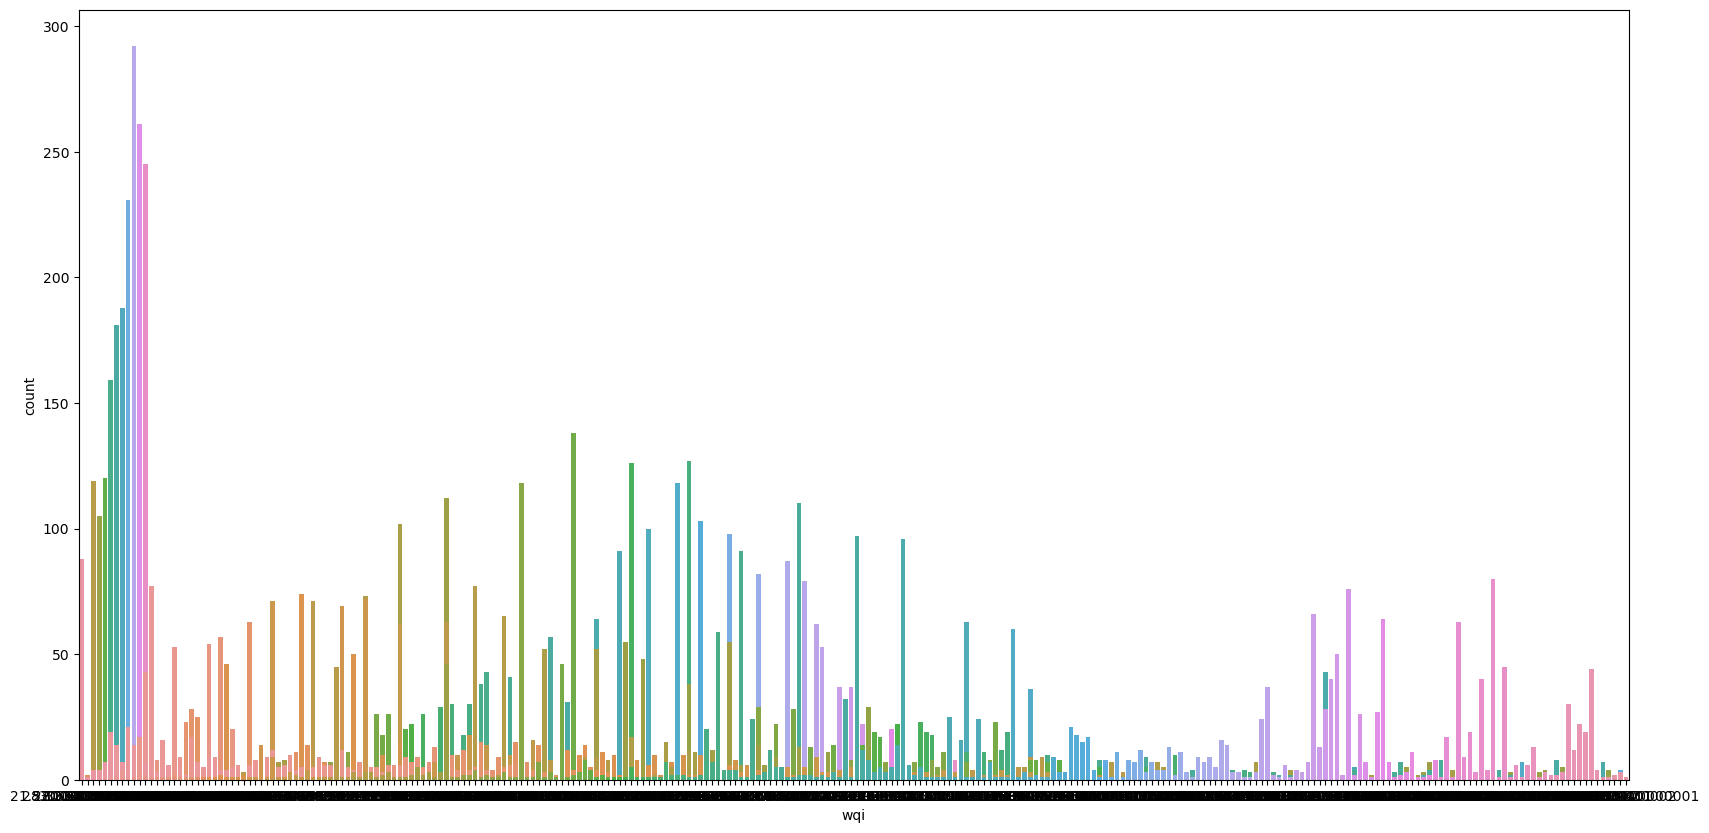

In [36]:
sns.countplot(data['year']) 
sns.countplot(data['do'])
sns.countplot(data['ph'])
sns.countplot(data['co'])
sns.countplot(data['bod'])
sns.countplot(data['na'])
sns.countplot(data['tc'])
sns.countplot(data['wqi'])

In [37]:
#Removing un necessary columns location state and the columnn created to calculate Water Quality Index
data.drop(['Temp','station','location','state','nbdo',"nec","nna","wph","wdo","wbdo","wec","wna","wco","npH","ndo","nco"],axis = 1,inplace=True)

In [38]:
data.head()

,do,ph,co,bod,na,tc,year,wqi
0,6.7,7.5,203.0,6.940049,0.1,27.0,2014,84.46
1,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,76.96
2,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,79.28
3,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,69.34
4,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,77.14


In [39]:
#Splitting the data into dependent and independent variables
x = data.iloc[:,0:7].values
y = data.iloc[:,7:].values

In [40]:
x

array([[6.70000000e+00, 7.50000000e+00, 2.03000000e+02, ...,
        1.00000000e-01, 2.70000000e+01, 2.01400000e+03],
       [5.70000000e+00, 7.20000000e+00, 1.89000000e+02, ...,
        2.00000000e-01, 8.39100000e+03, 2.01400000e+03],
       [6.30000000e+00, 6.90000000e+00, 1.79000000e+02, ...,
        1.00000000e-01, 5.33000000e+03, 2.01400000e+03],
       ...,
       [7.60000000e+00, 9.80000000e+01, 6.20000000e+00, ...,
        1.62307871e+00, 5.70000000e+02, 2.00300000e+03],
       [7.70000000e+00, 9.10000000e+01, 6.50000000e+00, ...,
        1.62307871e+00, 5.62000000e+02, 2.00300000e+03],
       [7.60000000e+00, 1.10000000e+02, 5.70000000e+00, ...,
        1.62307871e+00, 5.46000000e+02, 2.00300000e+03]])

In [41]:
x.shape

(1991, 7)

In [42]:
y.shape

(1991, 1)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [44]:
X_train.shape

(1592, 7)

In [45]:
X_test.shape

(399, 7)

In [46]:
y_train.shape

(1592, 1)

In [47]:
y_test.shape

(399, 1)

In [48]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators = 10 ,random_state = 0)
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

C:\Users\mahar\AppData\Local\Temp\ipykernel_4064\2145497779.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train, y_train)


In [49]:
y_pred

array([30.592, 75.02 , 93.82 , 88.2  , 67.38 , 93.82 , 70.8  , 82.742,
       28.192, 88.02 , 88.2  , 82.94 , 71.88 , 79.64 , 82.94 , 82.608,
       32.724, 69.29 , 70.8  , 73.93 , 77.612, 62.104, 82.04 , 82.58 ,
       85.26 , 33.06 , 83.664, 61.11 , 72.464, 88.2  , 66.174, 74.834,
       88.38 , 51.324, 85.242, 72.06 , 87.66 , 87.66 , 72.86 , 83.87 ,
       82.04 , 80.826, 72.06 , 45.676, 88.56 , 71.376, 67.38 , 91.428,
       66.44 , 37.556, 67.06 , 89.386, 55.82 , 82.94 , 76.42 , 85.614,
       82.04 , 68.62 , 78.66 , 70.8  , 83.52 , 60.666, 88.56 , 45.466,
       55.82 , 87.732, 79.64 , 70.922, 66.44 , 82.98 , 93.28 , 93.64 ,
       83.52 , 87.66 , 72.86 , 88.506, 82.94 , 86.684, 82.58 , 82.76 ,
       83.7  , 76.174, 77.868, 84.396, 88.488, 65.32 , 61.238, 83.7  ,
       94.18 , 69.492, 76.214, 78.67 , 66.44 , 83.794, 55.82 , 45.142,
       82.76 , 45.142, 79.46 , 82.98 , 84.608, 77.14 , 66.546, 73.04 ,
       82.94 , 42.61 , 82.04 , 61.44 , 87.66 , 79.64 , 94.18 , 82.94 ,
      

In [50]:
reg_rf.score(X_train, y_train)

0.9948711603144075

In [51]:
reg_rf.score(X_test, y_test)

0.9692766700278257

In [52]:
y_test[10:15]

array([[88.2 ],
       [82.94],
       [71.88],
       [79.64],
       [82.94]])

In [53]:
y_pred[10:15]

array([88.2 , 82.94, 71.88, 79.64, 82.94])

C:\Users\mahar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


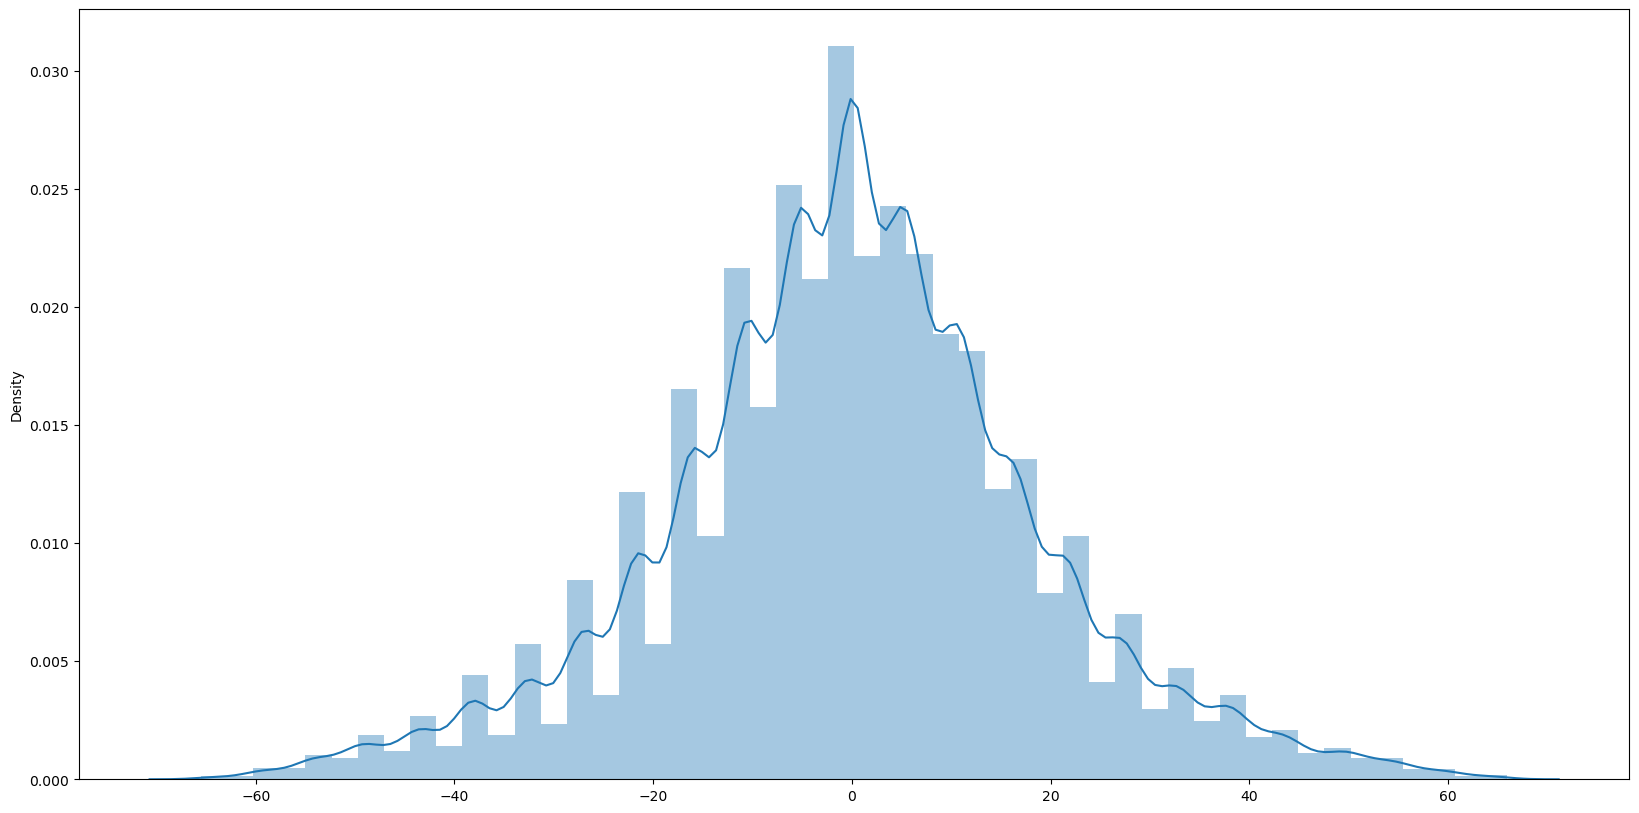

In [54]:
# Model Analysis
sns.distplot(y_test-y_pred)
plt.show()

In [55]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.9425563909774494
MSE: 5.63627572932331
RMSE: 2.374084187497004


In [56]:
metrics.r2_score(y_test, y_pred)

0.9692766700278257

In [57]:
import pickle
pickle.dump(reg_rf,open('wqi.pkl','wb'))
model = pickle.load(open('wqi.pkl','rb'))